In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [2]:
from keras.layers import Convolution2D,MaxPooling2D,Dropout,Dense,Flatten, GlobalAveragePooling2D
from keras import models,losses,optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import InceptionV3,VGG16
from keras.models import Model
import cv2

Using TensorFlow backend.


In [3]:
img = cv2.imread('dataset/train/A/001.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

In [4]:
cv2.imshow('this',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
for l in model2.layers[:249]:
    l.trainable = False
for l in model2.layers[249:]:
    l.trainable = True
    
'''for layer in base_model.layers:
        layer.trainable = False'''

'for layer in base_model.layers:\n        layer.trainable = False'

In [35]:
for l in model2.layers[:249]:
    l.trainable = False
for l in model2.layers[249:]:
    l.trainable = True

In [7]:
model2.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 3 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [32]:
model1 = models.Sequential()
model1.add(layer=Convolution2D(filters=32,kernel_size=(5,5),strides=(1,1),activation='relu',input_shape= (32,32,3)))
model1.add(layer = MaxPooling2D(strides=(2,2)))
model1.add(layer=Convolution2D(filters=64,kernel_size=(5,5),strides=(1,1),activation='relu'))
model1.add(layer = MaxPooling2D(strides=(2,2)))
#Flattening the pooled layer
model1.add(layer= Flatten())
#Creating the ANN
model1.add(layer = Dense(units = 1024, activation= 'relu'))
model1.add(layer = Dropout(0.5))
model1.add(layer = Dense(units = 24, activation='softmax'))

In [52]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_383 (Conv2D)          (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_384 (Conv2D)          (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6272)              0         
__________

In [33]:
optim = optimizers.adam(lr=0.001)
model1.compile(optimizer= optim,loss = losses.categorical_crossentropy,metrics = ['accuracy'])

In [35]:
def transform(image):
    return cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=20,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True,preprocessing_function=transform)
test_datagen = ImageDataGenerator(rescale=1./255,preprocessing_function=transform)

train_set = train_datagen.flow_from_directory('dataset/train/',target_size=(32, 32),batch_size=10,class_mode="categorical",color_mode='rgb',shuffle= True)
test_set = test_datagen.flow_from_directory('dataset/test',target_size=(32, 32),batch_size=1,class_mode="categorical",color_mode='rgb',shuffle= False)


Found 4972 images belonging to 24 classes.
Found 443 images belonging to 24 classes.


In [36]:
model1.fit_generator(train_set,steps_per_epoch=497,epochs=5,validation_data=test_set,validation_steps=443)

Epoch 1/5
497/497 [==============================] - 329s 661ms/step - loss: 2.2247 - acc: 0.3101 - val_loss: 1.1218 - val_acc: 0.6411
Epoch 2/5
497/497 [==============================] - 177s 355ms/step - loss: 1.2462 - acc: 0.5913 - val_loss: 0.5973 - val_acc: 0.8104
Epoch 3/5
497/497 [==============================] - 177s 356ms/step - loss: 0.8719 - acc: 0.7161 - val_loss: 0.4350 - val_acc: 0.8510
Epoch 4/5
497/497 [==============================] - 179s 359ms/step - loss: 0.6959 - acc: 0.7712 - val_loss: 0.5025 - val_acc: 0.8465
Epoch 5/5
497/497 [==============================] - 177s 357ms/step - loss: 0.5868 - acc: 0.8016 - val_loss: 0.2775 - val_acc: 0.9029


In [37]:
json_mod = model1.to_json()
with open('model1_manualCNN.json','w') as file:
    file.write(json_mod)
model1.save_weights('model1_manualCNN.h5')

# VGG16 network

In [2]:
from keras.layers import Convolution2D,MaxPooling2D,Dropout,Dense,Flatten, GlobalAveragePooling2D
from keras import models,losses,optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import InceptionV3,VGG16
from keras.models import Model
import cv2

Using TensorFlow backend.


In [3]:
prior = VGG16(
    include_top=False, 
    weights='imagenet',
    input_shape=(48, 48, 3)
)
model3 = models.Sequential()
model3.add(prior)
model3.add(Flatten())
model3.add(Dense(256, activation='relu', name='Dense_Intermediate'))
model3.add(Dropout(0.1, name='Dropout_Regularization'))
model3.add(Dense(24, activation='sigmoid', name='Output'))


In [4]:
for cnn_block_layer in model3.layers[0].layers:
    cnn_block_layer.trainable = False
model3.layers[0].trainable = False

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=20,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_set = train_datagen.flow_from_directory('dataset/train/',target_size=(48, 48),batch_size=10,class_mode="categorical",color_mode='rgb',shuffle= True)
test_set = test_datagen.flow_from_directory('dataset/test',target_size=(48, 48),batch_size=1,class_mode="categorical",color_mode='rgb',shuffle= False)


Found 4972 images belonging to 24 classes.
Found 443 images belonging to 24 classes.


In [ ]:
model3.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [69]:
import os
labels_count = dict()
for img_class in [ic for ic in os.listdir('dataset/train/') if ic[0] != '.']:
    labels_count[img_class] = len(os.listdir('dataset/train/' + img_class))
total_count = sum(labels_count.values())
class_weights = {cls: total_count / count for cls, count in 
                 enumerate(labels_count.values())}

In [72]:
model3.fit_generator(
    train_set,
    steps_per_epoch=len(train_set.filenames) // 10,
    epochs=10,
    validation_data=test_set,
    validation_steps=len(test_set.filenames) // 1,
    class_weight=class_weights
)

Epoch 1/10
497/497 [==============================] - 232s 467ms/step - loss: 12.5241 - acc: 0.8205 - val_loss: 0.2691 - val_acc: 0.8894
Epoch 2/10
497/497 [==============================] - 235s 473ms/step - loss: 11.3296 - acc: 0.8396 - val_loss: 0.3354 - val_acc: 0.8781
Epoch 3/10
497/497 [==============================] - 242s 486ms/step - loss: 10.6019 - acc: 0.8515 - val_loss: 0.3123 - val_acc: 0.8871
Epoch 4/10
497/497 [==============================] - 234s 470ms/step - loss: 10.6684 - acc: 0.8521 - val_loss: 0.2008 - val_acc: 0.9187
Epoch 5/10
497/497 [==============================] - 235s 473ms/step - loss: 9.8157 - acc: 0.8551 - val_loss: 0.2371 - val_acc: 0.8962
Epoch 6/10
497/497 [==============================] - 234s 470ms/step - loss: 9.4443 - acc: 0.8666 - val_loss: 0.1712 - val_acc: 0.9142
Epoch 7/10
497/497 [==============================] - 231s 464ms/step - loss: 9.4843 - acc: 0.8626 - val_loss: 0.2427 - val_acc: 0.9097
Epoch 8/10
497/497 [========================

In [83]:
json_mod = model3.to_json()
#Fine tuning of the model
with open('model3_VGG16.json','w') as file:
    file.write(json_mod)
model3.save_weights('model3_VGG16.h5')

In [74]:
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 512)               0         
_________________________________________________________________
Dense_Intermediate (Dense)   (None, 256)               131328    
_________________________________________________________________
Dropout_Regularization (Drop (None, 256)               0         
_________________________________________________________________
Output (Dense)               (None, 24)                6168      
Total params: 14,852,184
Trainable params: 137,496
Non-trainable params: 14,714,688
_________________________________________________________________


In [77]:
prior.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0         
__________

In [82]:
for layer in prior.layers[:-4]:
    layer.trainable = False
for layer in prior.layers[-4:]:
    layer.trainable = True
# Check the trainable status of the individual layers
for layer in prior.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x0000025650896780> False
<keras.layers.convolutional.Conv2D object at 0x0000025650896C50> False
<keras.layers.convolutional.Conv2D object at 0x0000025650896F60> False
<keras.layers.pooling.MaxPooling2D object at 0x00000256508D5400> False
<keras.layers.convolutional.Conv2D object at 0x00000256508D5278> False
<keras.layers.convolutional.Conv2D object at 0x00000256508EE630> False
<keras.layers.pooling.MaxPooling2D object at 0x00000256509081D0> False
<keras.layers.convolutional.Conv2D object at 0x0000025650908CF8> False
<keras.layers.convolutional.Conv2D object at 0x000002565093E1D0> False
<keras.layers.convolutional.Conv2D object at 0x00000256509554A8> False
<keras.layers.pooling.MaxPooling2D object at 0x0000025650970400> False
<keras.layers.convolutional.Conv2D object at 0x0000025650970CF8> False
<keras.layers.convolutional.Conv2D object at 0x00000256509A71D0> False
<keras.layers.convolutional.Conv2D object at 0x00000256509BF4A8> False
<ker

In [269]:
model3.fit_generator(
    train_set,
    steps_per_epoch=len(train_set.filenames) // 50,
    epochs=50,
    validation_data=test_set,
    validation_steps=len(test_set.filenames) // 1,
    class_weight=class_weights
)

Epoch 1/10
 16/497 [..............................] - ETA: 4:08 - loss: 123.3966 - acc: 0.4438

KeyboardInterrupt: 

# Inception v3 Fine tuned

In [3]:
from functools import partial, update_wrapper
import numpy as np
from sklearn.utils import class_weight
from keras.callbacks import ModelCheckpoint,TensorBoard
from keras import backend as K
import os.path
import fnmatch
import itertools

In [56]:
def transform(image):
    return cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=20,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True,preprocessing_function=transform)
test_datagen = ImageDataGenerator(rescale=1./255,preprocessing_function=transform)

train_set = train_datagen.flow_from_directory('dataset/train/',target_size=(64, 64),batch_size=10,class_mode="categorical",color_mode='rgb',shuffle= True)
test_set = test_datagen.flow_from_directory('dataset/test/',target_size=(64, 64),batch_size=1,class_mode="categorical",color_mode='rgb',shuffle= False)


Found 4972 images belonging to 24 classes.
Found 443 images belonging to 24 classes.


In [5]:
top_layers_checkpoint_path = 'cp.top.best.hdf5'
fine_tuned_checkpoint_path = 'cp.fine_tuned.best.hdf5'
new_extended_inception_weights = 'final_weights.hdf5'

In [57]:
def w_categorical_crossentropy(y_true, y_pred, weights):
    nb_cl = len(weights)
    final_mask = K.zeros_like(y_pred[:, 0])
    y_pred_max = K.max(y_pred, axis=1)
    y_pred_max = K.expand_dims(y_pred_max, 1)
    y_pred_max_mat = K.equal(y_pred, y_pred_max)
    for c_p, c_t in itertools.product(range(nb_cl), range(nb_cl)):
        final_mask += (K.cast(weights[c_t, c_p],K.floatx()) * K.cast(y_pred_max_mat[:, c_p] ,K.floatx())* K.cast(y_true[:, c_t],K.floatx()))
    return K.categorical_crossentropy(y_pred, y_true) * final_mask

In [58]:
def wrapped_partial(func, *args, **kwargs):
    partial_func = partial(func, *args, **kwargs)
    update_wrapper(partial_func, func)
    return partial_func

In [59]:
w_array = np.ones((2,2))
w_array[1,0] = 1.2
ncce = wrapped_partial(w_categorical_crossentropy, weights=w_array)

In [55]:
base_model = InceptionV3(weights = 'imagenet', include_top = False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024,activation = 'relu')(x)
predictions = Dense(24,activation = 'softmax')(x)
model2 = Model(inputs = base_model.input, output = predictions)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


In [60]:
for layer in base_model.layers:
    layer.trainable = False

In [61]:
model2.compile(optimizer='rmsprop', loss=ncce, metrics=['accuracy'])

In [62]:
#Save the model after every epoch.
mc_top = ModelCheckpoint(top_layers_checkpoint_path, monitor='val_acc', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)

#Save the TensorBoard logs. histogram_freq was 1 (gave errors) and now is 0. write_images was True (read that this is heavy) and now is False
tb = TensorBoard(log_dir='./logs', histogram_freq=0, write_graph=False, write_images=False)

In [63]:
import os
labels_count = dict()
for img_class in [ic for ic in os.listdir('dataset/train/') if ic[0] != '.']:
    labels_count[img_class] = len(os.listdir('dataset/train/' + img_class))
total_count = sum(labels_count.values())
class_weights = {cls: total_count / count for cls, count in 
                 enumerate(labels_count.values())}

In [64]:
model2.fit_generator(train_set,steps_per_epoch=len(train_set.filenames) // 10,epochs=10,validation_data=test_set,validation_steps=len(test_set.filenames) // 10,callbacks=[mc_top, tb],class_weight=class_weights)

Epoch 1/10
 56/497 [==>...........................] - ETA: 4:42 - loss: nan - acc: 0.0500

KeyboardInterrupt: 

In [21]:
for i, layer in enumerate(base_model.layers):
    print(i, layer.name)

0 input_1
1 conv2d_1
2 batch_normalization_1
3 activation_1
4 conv2d_2
5 batch_normalization_2
6 activation_2
7 conv2d_3
8 batch_normalization_3
9 activation_3
10 max_pooling2d_1
11 conv2d_4
12 batch_normalization_4
13 activation_4
14 conv2d_5
15 batch_normalization_5
16 activation_5
17 max_pooling2d_2
18 conv2d_9
19 batch_normalization_9
20 activation_9
21 conv2d_7
22 conv2d_10
23 batch_normalization_7
24 batch_normalization_10
25 activation_7
26 activation_10
27 average_pooling2d_1
28 conv2d_6
29 conv2d_8
30 conv2d_11
31 conv2d_12
32 batch_normalization_6
33 batch_normalization_8
34 batch_normalization_11
35 batch_normalization_12
36 activation_6
37 activation_8
38 activation_11
39 activation_12
40 mixed0
41 conv2d_16
42 batch_normalization_16
43 activation_16
44 conv2d_14
45 conv2d_17
46 batch_normalization_14
47 batch_normalization_17
48 activation_14
49 activation_17
50 average_pooling2d_2
51 conv2d_13
52 conv2d_15
53 conv2d_18
54 conv2d_19
55 batch_normalization_13
56 batch_norma

In [22]:
mc_fit = ModelCheckpoint(fine_tuned_checkpoint_path, monitor='val_acc', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)


In [23]:
if os.path.exists(fine_tuned_checkpoint_path):
    model1.load_weights(fine_tuned_checkpoint_path)
    print ("Checkpoint '" + fine_tuned_checkpoint_path + "' loaded.")

In [25]:
# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
# in other examples found it was 172 insted 249. 
# I took 249 according to https://keras.io/applications/#inceptionv3
for layer in model2.layers[:249]:
    layer.trainable = False
for layer in model2.layers[249:]:
    layer.trainable = True

In [27]:
from keras.optimizers import SGD
model2.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss=ncce, metrics=['accuracy'])

In [29]:
model2.fit_generator(train_set,steps_per_epoch=len(train_set.filenames) // 10,epochs=50,validation_data=test_set,validation_steps=len(test_set.filenames) // 10,callbacks=[mc_fit, tb],class_)

Epoch 1/50
113/113 [==============================] - 71s 627ms/step - loss: nan - acc: 0.2002 - val_loss: nan - val_acc: 0.1895
Epoch 2/50
113/113 [==============================] - 64s 566ms/step - loss: nan - acc: 0.2254 - val_loss: nan - val_acc: 0.1895
Epoch 3/50
 50/113 [============>.................] - ETA: 30s - loss: nan - acc: 0.2020

KeyboardInterrupt: 

In [3]:
def transform(image):
    return cv2.cvtColor(image,cv2.COLOR_RGB2HSV)

train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=0,shear_range=0.0,zoom_range=0.0,horizontal_flip=True,vertical_flip=True,preprocessing_function=transform)
test_datagen = ImageDataGenerator(rescale=1./255,preprocessing_function=transform)

train_set = train_datagen.flow_from_directory('dataset/train/',target_size=(48, 48),batch_size=10,class_mode="categorical",color_mode='rgb',shuffle= True)
test_set = test_datagen.flow_from_directory('dataset/test',target_size=(48, 48),batch_size=1,class_mode="categorical",color_mode='rgb',shuffle= False)


Found 4972 images belonging to 24 classes.
Found 443 images belonging to 24 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


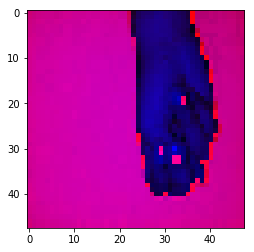

In [5]:
import matplotlib.pyplot as plt
plt.imshow(next(train_set)[0][0][:,:,:])
plt.show()

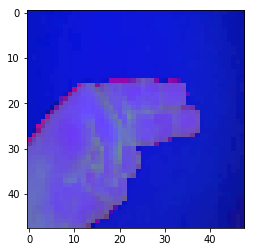

In [268]:
img = cv2.resize(transform(cv2.imread('dataset/train/H/005.jpg')),(48,48))
plt.imshow(img)
plt.show()

In [85]:
alphabets = ('a','b','c','d','e','f','g','h','i','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y')

In [171]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
test_image = image.load_img('dataset/train/L/001.jpg', target_size = (48, 48),grayscale=False)
#test_image = image.load_img('dataset/test_vague/Q_test.jpg', target_size = (128, 128),grayscale=False)
test_image = image.img_to_array(test_image)
test_image = cv2.cvtColor(test_image,cv2.COLOR_BGR2)
test_image = test_image/255
test_image = np.expand_dims(test_image, axis = 0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


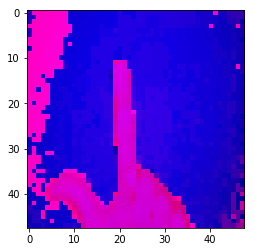

'l'

In [172]:
plt.imshow(test_image[0][:,:,:])
plt.show()
alphabets[np.argmax(model3.predict(test_image))]

In [ ]:
next(test_set)

In [177]:
test_image = next(test_set)
plt.imshow(test_image[0][0][:,:,:],cmap='color')
plt.show()
np.argmax(model.predict(test_image[0]))

ValueError: Colormap color is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, winter, winter_r

In [ ]:
cap = 